In [1]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200

In [2]:
%load_ext autoreload
%autoreload 2

# High-resolution Simulation Results and PRFM Theory

In [3]:
import prfm

In [4]:
data = prfm.simulations.load_sim_data()

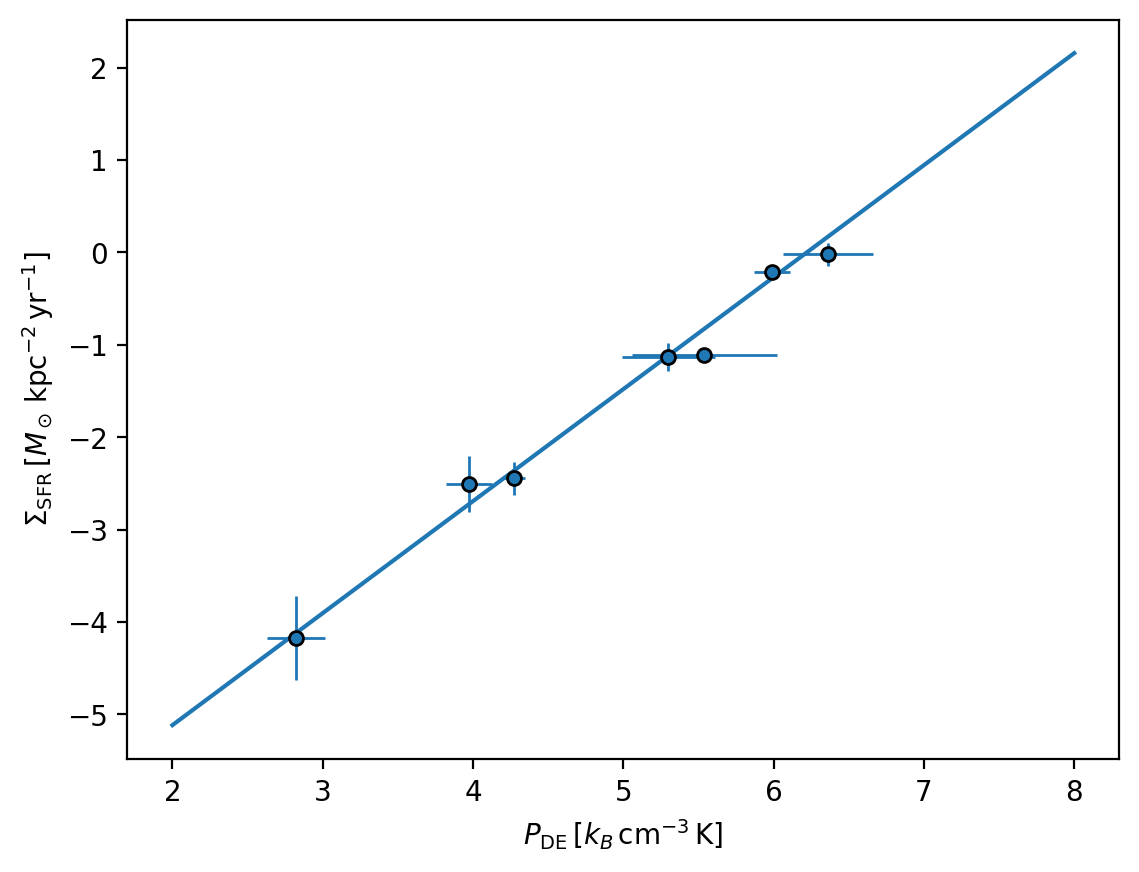

In [5]:
# quick plot of TIGRESS-classic points and fitting
# here the points are not identical to OK22
# -- recalculation from history files to get errorbars

p = prfm.simulations.add_one_sim(data["TIGRESS-classic"])
prfm.simulations.add_PSFR_model_line(model="tigress-classic")

Text(0, 0.5, '$\\Sigma_{\\rm SFR}\\, [M_\\odot\\,{\\rm kpc^{-2}\\,yr^{-1}}]$')

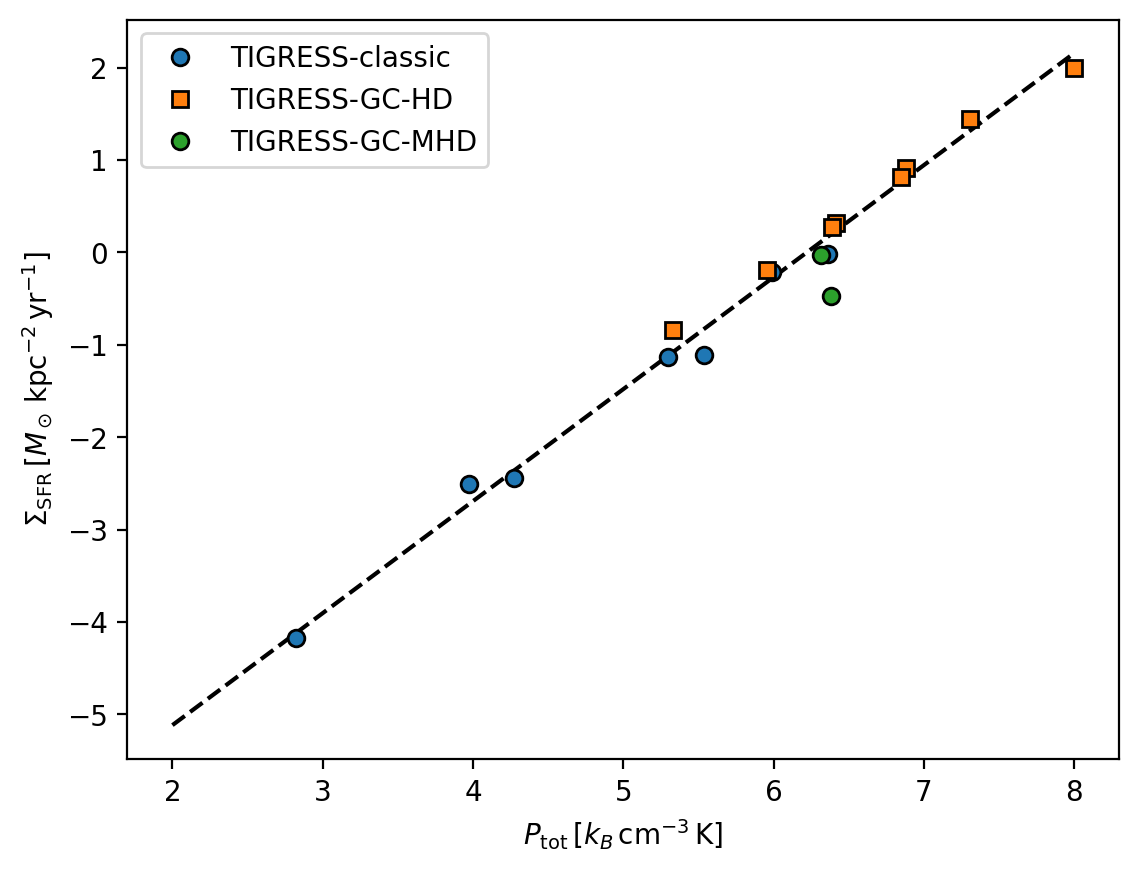

In [6]:
# plot for
# here the points are not identical to OK22
# -- recalculation from history files to get errorbars
xf = "Ptot"
yf = "SFR"
for k in ["TIGRESS-classic", "TIGRESS-GC"]:
    d = data[k]
    x = getattr(d, "log_{}".format(xf))
    y = getattr(d, "log_{}".format(yf))
    xerr = getattr(d, "log_{}_std".format(xf))
    yerr = getattr(d, "log_{}_std".format(yf))

    hd_idx = ~(d.Pimag > 0)

    if hd_idx.sum() == 0:
        p = plt.errorbar(x, y, label=d.paper, marker="o", ls="", mew=1, mec="k")
    else:
        p = plt.errorbar(
            x[hd_idx],
            y[hd_idx],
            label=f"{d.paper}-HD",
            marker="s",
            ls="",
            mew=1,
            mec="k",
        )
        p = plt.errorbar(
            x[~hd_idx],
            y[~hd_idx],
            label=f"{d.paper}-MHD",
            marker="o",
            ls="",
            mew=1,
            mec="k",
        )
prfm.simulations.add_PSFR_model_line(model="tigress-classic", color="k", ls="--")
plt.legend()
plt.xlabel(r"$P_{\rm tot}\, [k_B{\rm\,cm^{-3}\,K}]$")
plt.ylabel(r"$\Sigma_{\rm SFR}\, [M_\odot\,{\rm kpc^{-2}\,yr^{-1}}]$")

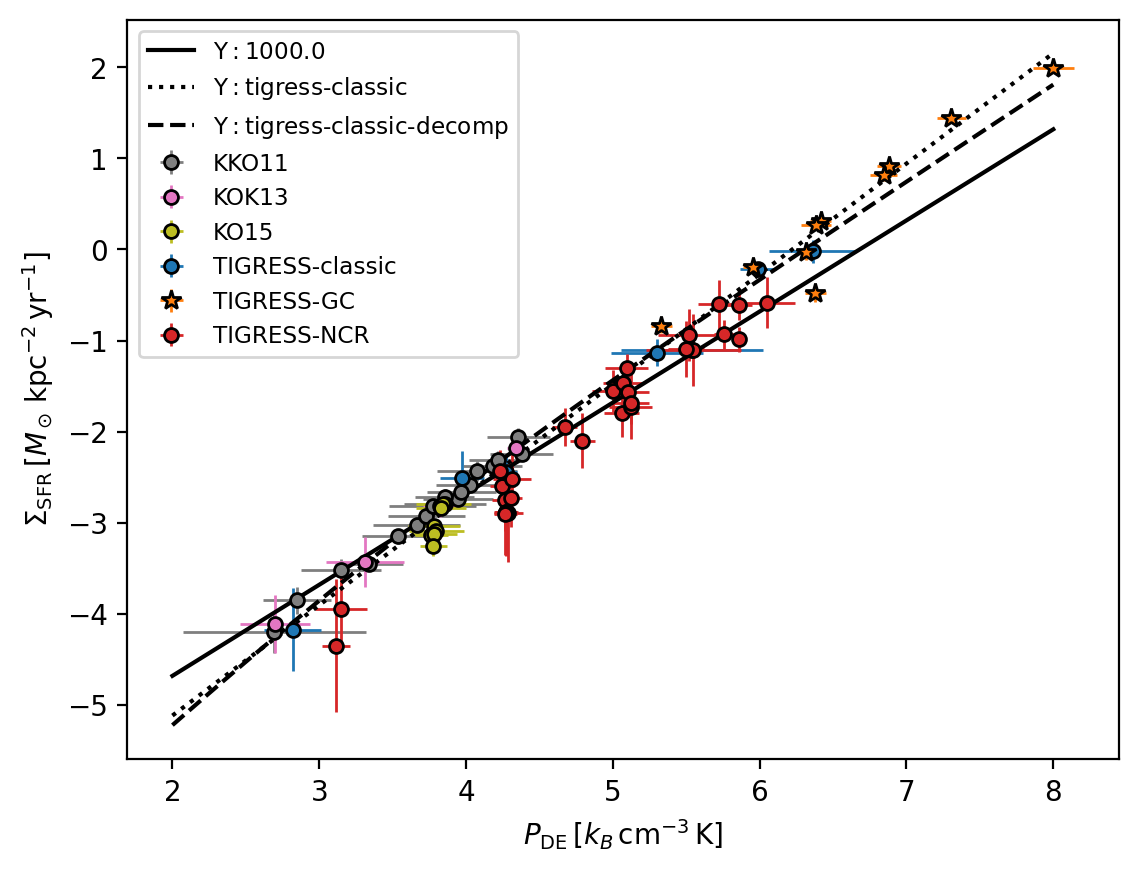

In [7]:
# all simulations
for i, (k, d) in enumerate(data.items()):
    if "table" in k:
        continue
    p = prfm.simulations.add_one_sim(d)

# P_SFR
prfm.simulations.add_PSFR_model_lines(Wmin=2, Wmax=8)
plt.legend(fontsize="small")

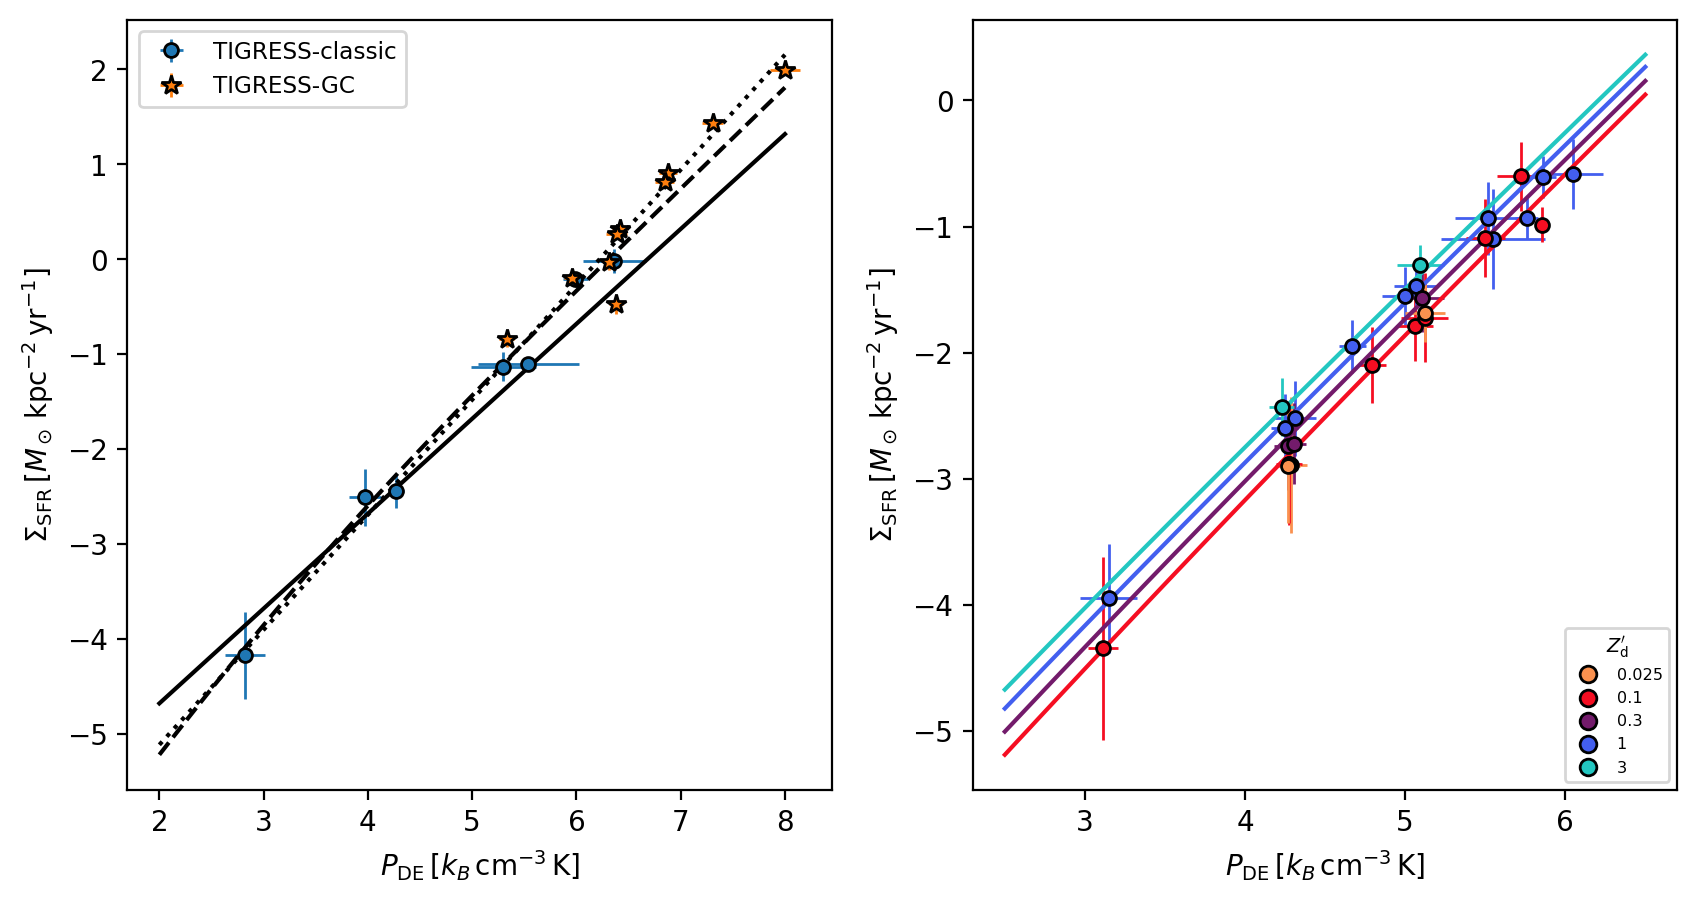

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, mlist in zip(axes, [["TIGRESS-classic", "TIGRESS-GC"], ["TIGRESS-NCR"]]):
    plt.sca(ax)
    for i, k in enumerate(mlist):
        d = data[k]
        if "NCR" in k:
            p = prfm.simulations.add_ncr_sim(d)
        else:
            p = prfm.simulations.add_one_sim(d)
plt.sca(axes[0])
plt.legend(fontsize="small")
prfm.simulations.add_PSFR_model_lines(Wmin=2, Wmax=8)

plt.sca(axes[1])
prfm.simulations.add_PSFR_ncr_model_lines(Wmin=2.5, Wmax=6.5)

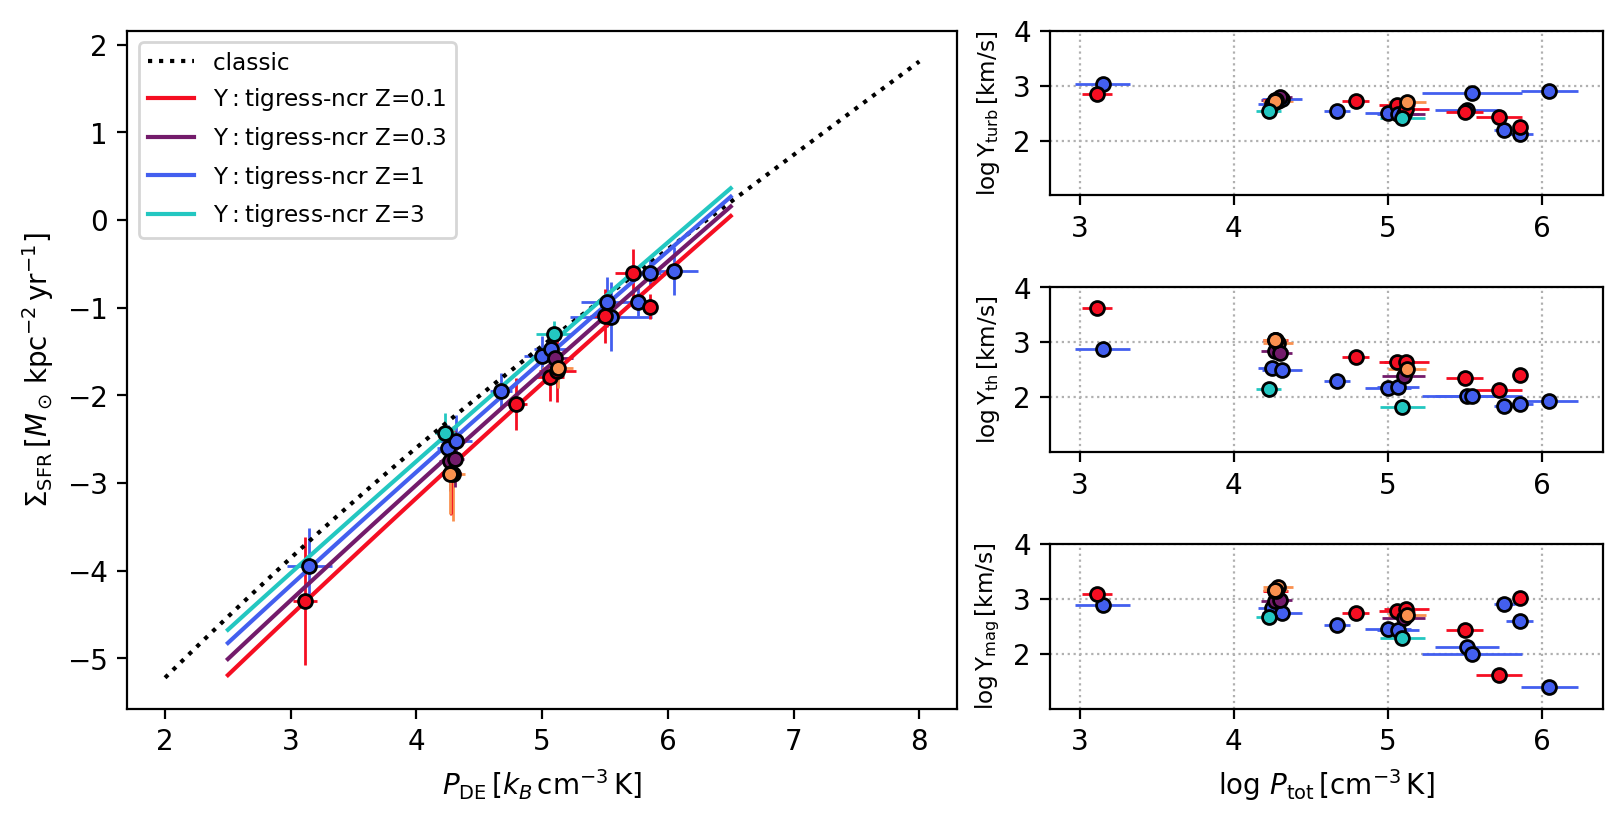

In [9]:
fig, main_ax, side_axes = prfm.simulations.setup_axes(
    figsize=(8, 4), width_ratios=(1.5, 1)
)
for k in ["TIGRESS-NCR"]:
    d = data[k]
    plt.sca(main_ax)
    prfm.simulations.add_ncr_sim(d, xf="Ptot", yf="SFR")
    for ax, yf in zip(side_axes, ["Y_Pturb", "Y_Pth", "Y_Pimag"]):
        plt.sca(ax)
        prfm.simulations.add_ncr_sim(d, yf=yf, legend=0)
        plt.ylim(1, 4)
        plt.yticks([2, 3, 4])
        plt.ylabel(
            r"$\log \Upsilon_{{\rm {}}}\,[{{\rm km/s}}]$".format(
                yf[2:].replace("Pi", "P")[1:]
            ),
            fontsize="small",
        )
        plt.grid("on", ls=":")
    plt.xlabel(r"$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$")
plt.sca(main_ax)
prfm.simulations.add_PSFR_model_line(
    model="tigress-classic-decomp", ls=":", color="k", label="classic "
)
# prfm.simulations.add_PSFR_model_line(
#     model="tigress-ncr-decomp", ls="--", color="k", label="NCR Z=1"
# )
prfm.simulations.add_PSFR_ncr_model_lines(Wmin=2.5, Wmax=6.5)
plt.legend(fontsize="small")

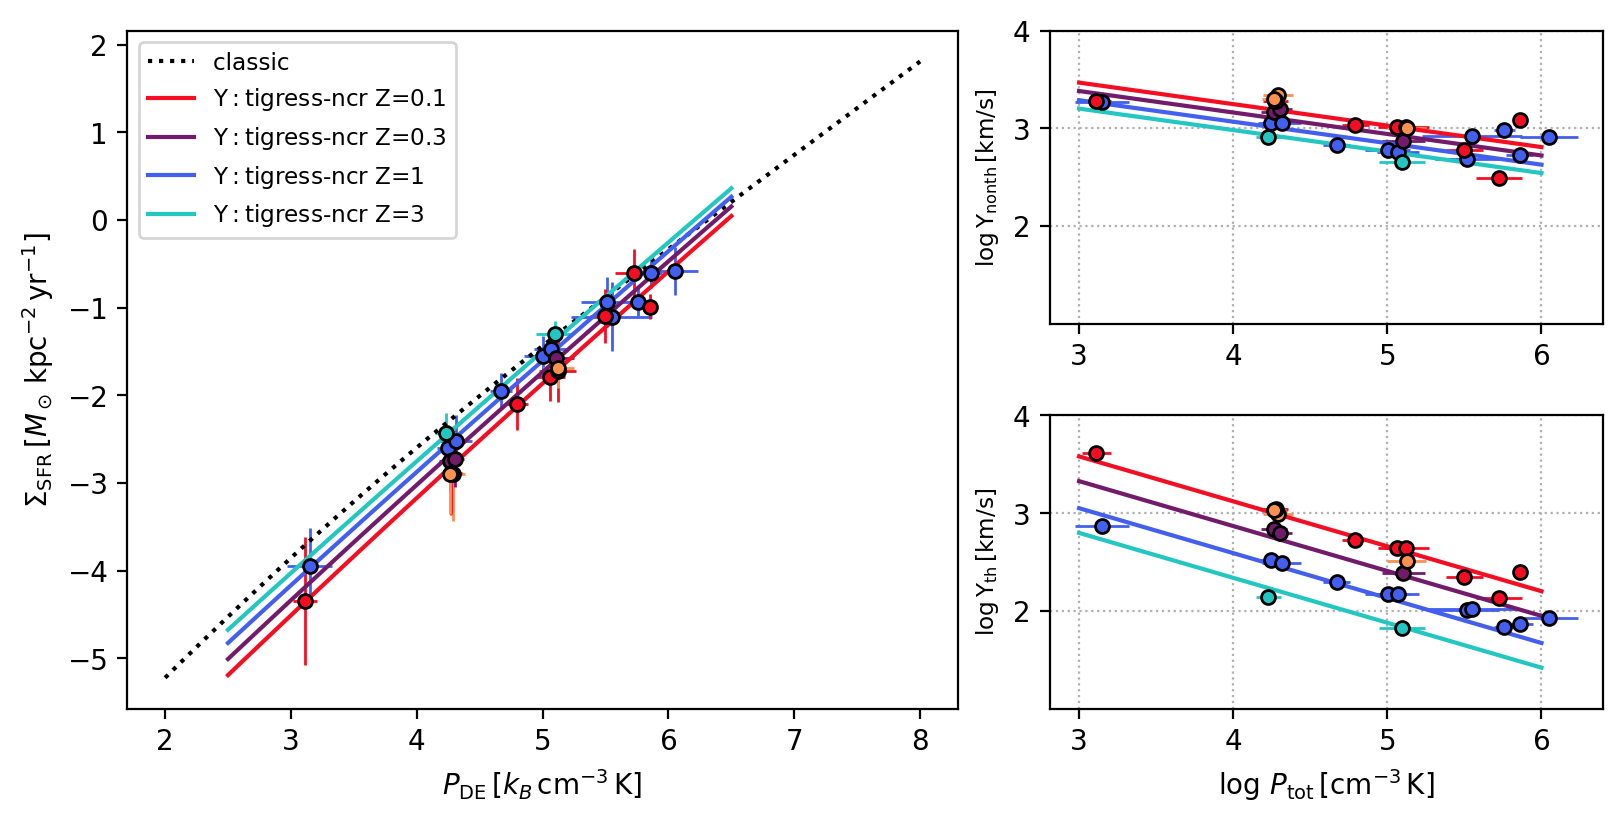

In [10]:
fig, main_ax, side_axes = prfm.simulations.setup_axes(
    nrow=2, figsize=(8, 4), width_ratios=(1.5, 1)
)
for k in ["TIGRESS-NCR"]:
    d = data[k]
    plt.sca(main_ax)
    prfm.simulations.add_ncr_sim(d, xf="Ptot", yf="SFR")
    for ax, yf in zip(side_axes, ["Y_Pnonth", "Y_Pth"]):
        plt.sca(ax)
        prfm.simulations.add_ncr_sim(d, yf=yf, legend=0)
        plt.ylim(1, 4)
        plt.yticks([2, 3, 4])
        plt.ylabel(
            r"$\log \Upsilon_{{\rm {}}}\,[{{\rm km/s}}]$".format(
                yf[2:].replace("Pi", "P")[1:]
            ),
            fontsize="small",
        )
        plt.grid("on", ls=":")
    plt.xlabel(r"$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$")
plt.sca(main_ax)
prfm.simulations.add_PSFR_model_line(
    model="tigress-classic-decomp", ls=":", color="k", label="classic "
)
prfm.simulations.add_PSFR_ncr_model_lines(Wmin=2.5, Wmax=6.5)

plt.legend(fontsize="small")
for ax, yf in zip(side_axes, ["trb", "th"]):
    plt.sca(ax)
    prfm.simulations.add_yield_ncr_model_lines(Wmin=3, Wmax=6, comp=yf)